In [4]:
from custom_loss_fn_tester import test_custom_loss
import numpy as np
import torch




In [5]:
class HistogramLoss(torch.nn.Module):
    def __init__(self, num_bins=256):
        super(HistogramLoss, self).__init__()
        self.num_bins = num_bins

    def histogram_intersection(hist1, hist2):
        min_hist = torch.min(hist1, hist2)
        return torch.sum(min_hist)

    def forward(self, input_image, target_image):
        hist_input = torch.histc(input_image, bins=self.num_bins, min=0, max=255)
        hist_target = torch.histc(target_image, bins=self.num_bins, min=0, max=255)

        hist_input = hist_input / hist_input.sum()
        hist_target = hist_target / hist_target.sum()

        loss = 1 - self.histogram_intersection(hist_input, hist_target)

        return loss

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Loss function cannot work with shape (x) Check loss fn code for error.
 Failed wil error message:
 HistogramLoss.histogram_intersection() takes 2 positional arguments but 3 were given
Loss function cannot work with shape (x, y) Check loss fn code for error.
 Failed wil error message:
 HistogramLoss.histogram_intersection() takes 2 positional arguments but 3 were given
Loss function cannot work with shape (channel, x, y) Check loss fn code for error.
 Failed wil error message:
 HistogramLoss.histogram_intersection() takes 2 positional arguments but 3 were given
Loss function cannot work with shape (batch, channel, x, y) Check loss fn code for error.
 Failed wil error message:
 HistogramLoss.histogram_intersection() takes 2 positional arguments but 3 were given


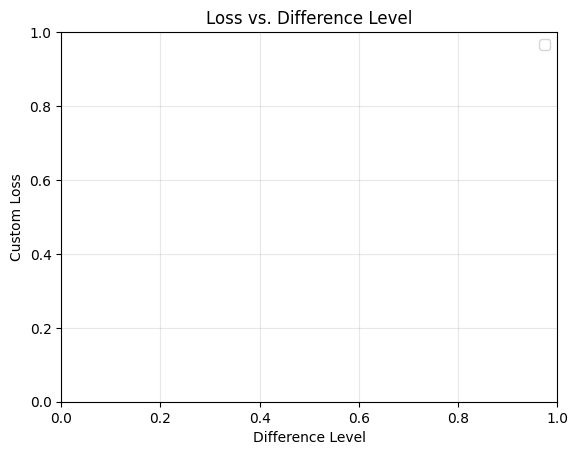

In [6]:
test_custom_loss(HistogramLoss())